# Overview

This study aims to study the relationships between three distinct indicators: migrant influx, policy effectiveness, and political rhetoric in the EU. As such, data on these indicators is collected from four open-source public datasets, that have been widely used in academic research, and have a documented, verified, and consistent data collection and coding process.

The five datasets from which data is obtained for this study are:

1.  European Values Study (EVS)
2.  V-Dem
3.  Migrant Integration Policy Index (MIPEX)
4.  Eurostat
5.  World Bank Open Data - GDP, PPP (current US$)

Data will be extracted from 2017 - 2019 from the EVS, from 2017 - 2019 from the MIPEX, from 2011 - 2022 from Eurostat, and from 2017-2019 for the V-Dem and World Bank datasets. This decision is to ensure overlap between datasets in years, which is crucial for making inferences that are representative.

Each individual dataset will be cleaned and standardised, and normalised where needed. Datasets will be merged using 'Country' and 'Year' as keys. Misisng data will be handled after determining whether it is Missing Completely at Random (MCAR) or not.

The full code contains five key sections: Sections 1 and 2 deal with *data preprocessing*, Sections 3 and 4 contain the *preliminary and confirmatory analysis* and Section 5 contains an exploratory third analysis that forms part of the study's integration and discussion.

This codebook contains section 1 and 2.

1.   Section 1: Data Extraction and Cleaning
2.   Section 2: Data Transformation
3.   Section 3: Exploratory Data Analysis
4.   Section 4: Confirmatory Tests (Study 1 and Study 2)
5.   Section 5: Hierarchical Clustering of Policy Domains


In some cases the file may not run properly if opened on a desktop python kernel, as Jupyter was used as a terminal to create this file. In that case, the file can be accessed by uploading and viewing through Google Colab, where it was originally written.

Note: ChatGPT was used to improve visualisations and code debugging



##Section 1 : Data Extraction and Cleaning

In [1]:
# First,we install primary packages for data cleaning and transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import joblib
import json

In [2]:
# Next, this project uses Google Colab's Jupyter Terminal to run the code, it requires connection to a Google Drive
# NB: In order to run this code on another computer or terminal, this code chunk can be excluded, and the subsequent code chunk should just have the file address replaced with the one in your system

from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


##Data extraction


###*Dataset 1: EVS Wave 7 (2017-2022)*

In [ ]:
# Step 1: Converting the raw dataset from stata to excel - EVS Wave 7
##The EVS Wave 7 dataset can be downloaded from the GESIS website (requires a login; https://europeanvaluesstudy.eu/).
##As the data is only accessible through STATA or SPSS, it is first converted to a readable format similar to other datasets for ease in transforming them later.

## Reading the .dta file with `convert_categoricals=False` to avoid duplicate value label issues
evs_wave7_df = pd.read_stata('/content/drive/My Drive/PB310/EVSWave7.dta', convert_categoricals=False)

# Saving the dataset as an Excel file
evs_wave7_df.to_excel('/content/drive/My Drive/PB310/EVSWave7.xlsx', index=False, engine='openpyxl')

print("The file has been successfully converted to Excel and saved as 'EVSWave7.xlsx' in your Google Drive.")

In [ ]:
# Loading the EVSWave7 Excel file
evs_wave7_df = pd.read_excel('/content/drive/My Drive/PB310/EVSWave7.xlsx')

In [ ]:
# Step 2: Selecting specific variables (identifiers + other variables) to keep in the pre-final dataset
variables_to_keep = [
    'doi', 'studynoc', 'versionc', 'id_cocas', 'caseno', 'year', 'fw_start', 'fw_end',
    'country', 'c_abrv', 'cntry_y',  # Identifiers
    'v261', 'v51', 'v174_LR', 'v80', 'v184', 'v185', 'v186', 'v187',
    'v188', 'v219', 'v24', 'v225', 'v226', 'v227', 'v230', 'v232', 'v242', 'v244', 'v102'
    # NB: Refer to the Appendix for a list of variables selected, justification for selection, and EVS response scoring scales
]
rawEVS_df = evs_wave7_df[variables_to_keep]

In [ ]:
# Step 3: Renaming variables for ease of access and efficiency
## Columns are renamed based on the indicators they measure. For a full list of the renamed variables and source variables, please refer to the Appendix.
## All variables except study identifiers and doi columns are renamed (as they are not directly related to the data analysis)
rawEVS_df.rename(columns={
    'v225': 'sex', # Control; sex of the resondent
    'v226': 'age', # Control; age of the respondent
    'v227': 'citizen', # Control; whether respondent is a citizen of the country in which survey is conducted
    'v230': 'lineage_f', # Control; whether respondent's paternal lineage is in the country
    'v232': 'lineage_m', # Control; whether respondent's maternal lineage is in the country
    'v102': 'political-spectrum', # What the respondent's political affiliation (Left-Right) is
    'v242': 'education', # Control; education level of respondent
    'v244': 'employment', # Control; employment status of respondent
    'v261': 'income', # Control; income level of respondent
    'v51': 'religion', # Control; whether respondent is religious or agnostic-athiest
    'v174_LR': 'party_support', #Indicator; whether respondent supports national party positions (Left-Right)
    'v80': 'immig_job_priority', #Indicator; opinion on immigrant's labour market access
    'v184': 'immig_development', #Indicator; opiinion on immigrant's contribution to national development
    'v185': 'immig_steal_jobs', #Indicator; opinion on immigrants "stealing jobs"
    'v186': 'immig_crime', #Indicator; opinion on immmigrants' likelihood of criminality
    'v187': 'immig_welfare', #Indicator; opinion on welfare support for immigrants
    'v188': 'immig_culture', # Indicator; opinion on immigrant culture
    'v219': 'immig_concern', # Indicator; opinion on immigrant livelihood
    'v24': 'immig_neighbours',# Indicator: opinion on immigrant neighbours
    }, inplace=True)

# Step 4: Saving the cleaned dataset to Google Drive
output_path = '/content/drive/My Drive/PB310/RawEVSWave7.xlsx'
rawEVS_df.to_excel(output_path, index=False, engine='openpyxl')

print(f"The cleaned dataset has been saved to: {output_path}")

##With this, the raw dataset has been extracted to produce our EVS dataset. All datasets are first extracted before cleaning commences.
##This decision was made to ensure systematic data collection and cleaning, and helps in avoiding missteps.

<ipython-input-25-64de23dffddb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawEVS_df.rename(columns={


The cleaned dataset has been saved to: /content/drive/My Drive/PB310/RawEVSWave7.xlsx


###*Dataset 2: Eurostat*

In [ ]:
# Step 1: Downloading the Raw Eurostat Dataset
##*The raw Eurostat dataset on net migration can be accessed on the official Eurostat website (https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/migr_netmigr?format=TSV&compressed=true)*

#Loading the Eurostat dataset
eurostat_cleaned = pd.read_excel('/content/drive/My Drive/PB310/Eurostat-Cleaned-Full.xlsx')
##To replicate this code, replace the Drive link with the URL of your dataset, or paste the link in the comments above to directly download data from Eurostat

# Step 2: Defining the list of EU countries and their codes
## The Eurostat net migration dataset does not have the ISO country codes attached to the columns, while the EVS does not have country names attached to columns. Thus, the decision was made to transform all datasets to include country codes
## This code contains countries mapped to their country codes
eu_countries = {
    'Austria': 'AT', 'Belgium': 'BE', 'Bulgaria': 'BG', 'Croatia': 'HR',
    'Cyprus': 'CY', 'Czechia': 'CZ', 'Denmark': 'DK', 'Estonia': 'EE',
    'Finland': 'FI', 'France': 'FR', 'Germany': 'DE', 'Greece': 'GR',
    'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Latvia': 'LV',
    'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT', 'Netherlands': 'NL',
    'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovakia': 'SK',
    'Slovenia': 'SI', 'Spain': 'ES', 'Sweden': 'SE'
}

# Step 3: Filtering rows for EU countries and removing non-EU states
eurostat_eu = eurostat_cleaned[eurostat_cleaned['Country'].isin(eu_countries.keys())]

# Step 4: Adding a new column for country codes to combine datasets later
eurostat_eu['country_code'] = eurostat_eu['Country'].map(eu_countries)

## Saving the filtered and updated dataset
output_path = '/content/drive/My Drive/PB310/eurostat_eu_cleaned.xlsx'
eurostat_eu.to_excel(output_path, index=False, engine='openpyxl')

print(f"Filtered dataset with country codes saved to: {output_path}")


<ipython-input-13-6dde54d177f7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurostat_eu['country_code'] = eurostat_eu['Country'].map(eu_countries)


Filtered dataset with country codes saved to: /content/drive/My Drive/PB310/eurostat_eu_cleaned.xlsx


###*Dataset 3: Varieties of Democracy, V-Dem (2024)*

In [ ]:
# Step 1: Downloading the Raw V-Dem Dataset
## The Raw V-Dem data can be accessed through the V-Dem website (https://v-dem.net/data/the-v-dem-dataset/)

v_dem_df = pd.read_excel('/content/drive/My Drive/PB310/VDem-CY-2024.xlsx')

# Step 3: Defining EU countries to extract country-specific data
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
    'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# Step 4: Filtering the dataset to only pull EU member state data
filtered_df = v_dem_df[
    (v_dem_df['country_name'].isin(eu_countries)) &  # Select only EU countries
    (v_dem_df['year'].between(2012, 2022))  # Select years 2017-2022
]

# Step 5: Selecting variables required for analysis
variables_to_keep = [
    'country_name',
    'country_text_id',
    'country_id',
    'year',
    'historical_date',
    'project',
    'historical',
    'histname',  # Indicators
    'v2xpas_exclusion_government', #How anti-immigrant are government coalitions?
    'v2xpas_religion_government', #Is religious sentiment used to spread hateful rhetoric?
    'v2smpolhate'  #How much hateful and exclusionary rhetoric is used by ruling coalitions?
]
cleaned_df = filtered_df[variables_to_keep]

# Step 6: Save the cleaned dataset
output_path = '/content/drive/My Drive/PB310/Raw-VDem-CY-2024.xlsx'
cleaned_df.to_excel(output_path, index=False, engine='openpyxl')

### *Dataset 4: Migrant Integration Policy Index, MIPEX (2011-2019)*

In [ ]:
# The MIPEX can be accessed directly on the MIPEX website (https://www.mipex.eu/)
## As countries can be shortlisted and selected to form the final dataset, there was no further extraction required, and the data is just loaded into the system.


mipex_file_path = '/content/drive/My Drive/PB310/Cleaned-MIPEX.xlsx'

# Load the Excel file
mipex_data = pd.read_excel(mipex_file_path)

# Display the first few rows of the dataset
print("First 5 rows of the MIPEX dataset:")
print(mipex_data.head())

## With this, four of the required datasets have been successfully obtained and installed. Next, we move on to data cleaning.

##Data Cleaning


###*Dataset 1: EVS 2017*
##### *NB: Only the EVS and Eurostat require cleaning. The full data cleaning procedure and decisions made in the process are outlined with the rationale for cleaning decisions in the Appendix.*

In [ ]:
# The EVS survey responses are coded based on whether responded answers a question, refuses to answer, or responds spontaneously/states they do not know the answer.
## Depending on their responses, the values either fall into a likert scale of responses (ranging between 1-10 or 1-5, etc.), or random numbers (such as 0, 88, 99) to indicate the type of non-response.
## This means the trimmed dataset will need to be cleaned, and non-response scores will need to be replaced with NANs. This decision was made as missing values can later be imputed.

# Step 1: Importing necessary libraries
import pandas as pd
from datetime import datetime

# Step 2: Drive upload
file_path = '/content/drive/My Drive/PB310/RawEVSWave7.xlsx'
evs_data = pd.read_excel(file_path)

# Step 3: Cleaning the columns
## Columns were cleaned based on the values given in the EVS codebook (access here: https://europeanvaluesstudy.eu/methodology-data-documentation/survey-2017/full-release-evs2017/documentation-survey-2017/)
## Scores falling outside the range of actual responses are reverted to 'NAN'

# Indicator: income
evs_data['income'] = evs_data['income'].apply(
    lambda x: x if 1 <= x <= 10 else None )

# Indicator: party_support
evs_data['party_support'] = evs_data['party_support'].apply(lambda x: x if 1 <= x <= 10 else None)

# Indicator: immig_development
evs_data['immig_development'] = evs_data['immig_development'].apply(lambda x: x if 1 <= x <= 5 else None)

# Indicator: immg_steal_jobs
evs_data['immig_steal_jobs'] = evs_data['immig_steal_jobs'].apply(lambda x: x if 1 <= x <= 10 else None)

# Indicators: immig_crime, immig_welfare, immig_culture
for column in ['immig_crime', 'immig_welfare', 'immig_culture']:
    evs_data[column] = evs_data[column].apply(lambda x: x if 1 <= x <= 10 else None)

# Indicator: immig_concern
evs_data['immig_concern'] = evs_data['immig_concern'].apply(lambda x: x if 1 <= x <= 5 else None)

# Indicator: immig_neighbours
evs_data['immig_neighbours'] = evs_data['immig_neighbours'].apply(lambda x: x if x in [1, 2] else None)

#  'immig_job_priority' indicator
evs_data['immig_job_priority'] = evs_data['immig_job_priority'].apply(
    lambda x: x if 1 <= x <= 5 else None )

# Indicator: religion
evs_data['religion'] = evs_data['religion'].apply(lambda x: x if x in [1, 2] else None)

# Indicator: employment (creating dummy variable)
evs_data['employment'] = evs_data['employment'].apply(
    lambda x: 1 if x in [1, 2, 3] else (0 if x in [4, 5, 6, 7, 8, 9] else None)
)

# Indicator: education (creating dummy variable)
## Education was asked to be reported as 'no.of years required to complete education' with the code 888 = "don't know when I will complete my education" and 0 = no education
### This was changed into a binary variable, with any number of years of education being assigned 1, and no education assigned 0.
evs_data['education'] = evs_data['education'].apply(
    lambda x: 1 if (1 <= x <= 50 or x == 888) else (0 if x == 00 else None)
)

# Indicator: age (converting year of birth to actual age)
## The EVS does not record age, but rather a respondent's year of birth. Here, YOB is converted to age.

current_year = datetime.now().year
evs_data['age'] = evs_data['age'].apply(lambda x: current_year - x if x > 1900 else None)

# Indicator: political_spectrum
evs_data['political-spectrum'] = evs_data['political-spectrum'].apply(
    lambda x: x if 1 <= x <= 10 else None
)


# Indicators: lineage_m, lineage_f, citizen
for column in ['lineage_m', 'lineage_f', 'citizen']:
    evs_data[column] = evs_data[column].apply(lambda x: x if x in [1, 2] else None)

# Step 4: Save the cleaned dataset
output_path = '/content/drive/My Drive/PB310/CleanedEVSWave7.xlsx'
evs_data.to_excel(output_path, index=False, engine='openpyxl')

print(f"The cleaned dataset has been saved to: {output_path}")


The cleaned dataset has been saved to: /content/drive/My Drive/PB310/CleanedEVSWave7.xlsx


In [ ]:
# The EVS dataset now only contains valid responses and NANs. For the dataset to be fit for analysis, the decision was made to resolve NANs through testing for MCAR, and then, imputing as necessary.
## To do this, it is first necessary to know how many values are missing in the EVS dataset.

# Step 1: Generate a summary of missing values for each column
missing_summary = evs_data.isnull().sum()

# Step 2: Calculate the percentage of missing values for each column
missing_percent = evs_data.isnull().mean() * 100

# Step 3: Combine the counts and percentages into a single DataFrame
missing_table = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percent (%)': missing_percent
}).sort_values(by='Missing Percent (%)', ascending=False)

# View the missing table
print("Missing Value Summary:")
print(missing_table)

# Optional: Save the missing summary to an Excel file
missing_summary_path = '/content/drive/My Drive/PB310/MissingValuesSummary.xlsx'
missing_table.to_excel(missing_summary_path, engine='openpyxl')
print(f"Missing summary saved to: {missing_summary_path}")

## From the output, it seems like party support, political-spectrum, and income seem to be the variables with most NANs.


Missing Value Summary:
                    Missing Count  Missing Percent (%)
party_support               19093            32.122548
political-spectrum          11715            19.709613
income                       8740            14.704398
immig_culture                3732             6.278812
education                    3411             5.738753
immig_neighbours             2918             4.909317
immig_welfare                2860             4.811737
immig_crime                  2759             4.641812
immig_development            2480             4.172415
immig_steal_jobs             2049             3.447290
immig_concern                1059             1.781688
employment                    822             1.382954
immig_job_priority            805             1.354352
religion                      454             0.763821
lineage_f                     396             0.666240
age                           325             0.546788
lineage_m                     220         

In [ ]:
# Testing for MCAR in Python is done by approximation using a chi-square test. First, we test for MCAR, and then make a decision on how to impute/deal with missing values

from scipy.stats import chi2_contingency

# Create a binary missingness matrix
missing_binary = evs_data.isnull().astype(int)

# Test each variable for MCAR using chi-square
for column in missing_binary.columns:
    contingency_table = pd.crosstab(missing_binary[column], missing_binary.sum(axis=1) > 0)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Variable: {column}, p-value: {p}")

    # Interpretation
    if p > 0.05:
        print(f"Data for {column} is likely MCAR (p > 0.05).")
    else:
        print(f"Data for {column} is NOT MCAR (p <= 0.05).")

## From the output, it's clear the data is a mix of MCAR and MAR.


Variable: doi, p-value: 1.0
Data for doi is likely MCAR (p > 0.05).
Variable: studynoc, p-value: 1.0
Data for studynoc is likely MCAR (p > 0.05).
Variable: versionc, p-value: 1.0
Data for versionc is likely MCAR (p > 0.05).
Variable: id_cocas, p-value: 1.0
Data for id_cocas is likely MCAR (p > 0.05).
Variable: caseno, p-value: 1.0
Data for caseno is likely MCAR (p > 0.05).
Variable: year, p-value: 1.0
Data for year is likely MCAR (p > 0.05).
Variable: fw_start, p-value: 1.0
Data for fw_start is likely MCAR (p > 0.05).
Variable: fw_end, p-value: 1.0
Data for fw_end is likely MCAR (p > 0.05).
Variable: country, p-value: 1.0
Data for country is likely MCAR (p > 0.05).
Variable: c_abrv, p-value: 1.0
Data for c_abrv is likely MCAR (p > 0.05).
Variable: cntry_y, p-value: 1.0
Data for cntry_y is likely MCAR (p > 0.05).
Variable: income, p-value: 0.0
Data for income is NOT MCAR (p <= 0.05).
Variable: religion, p-value: 3.8678640124493296e-87
Data for religion is NOT MCAR (p <= 0.05).
Variable:

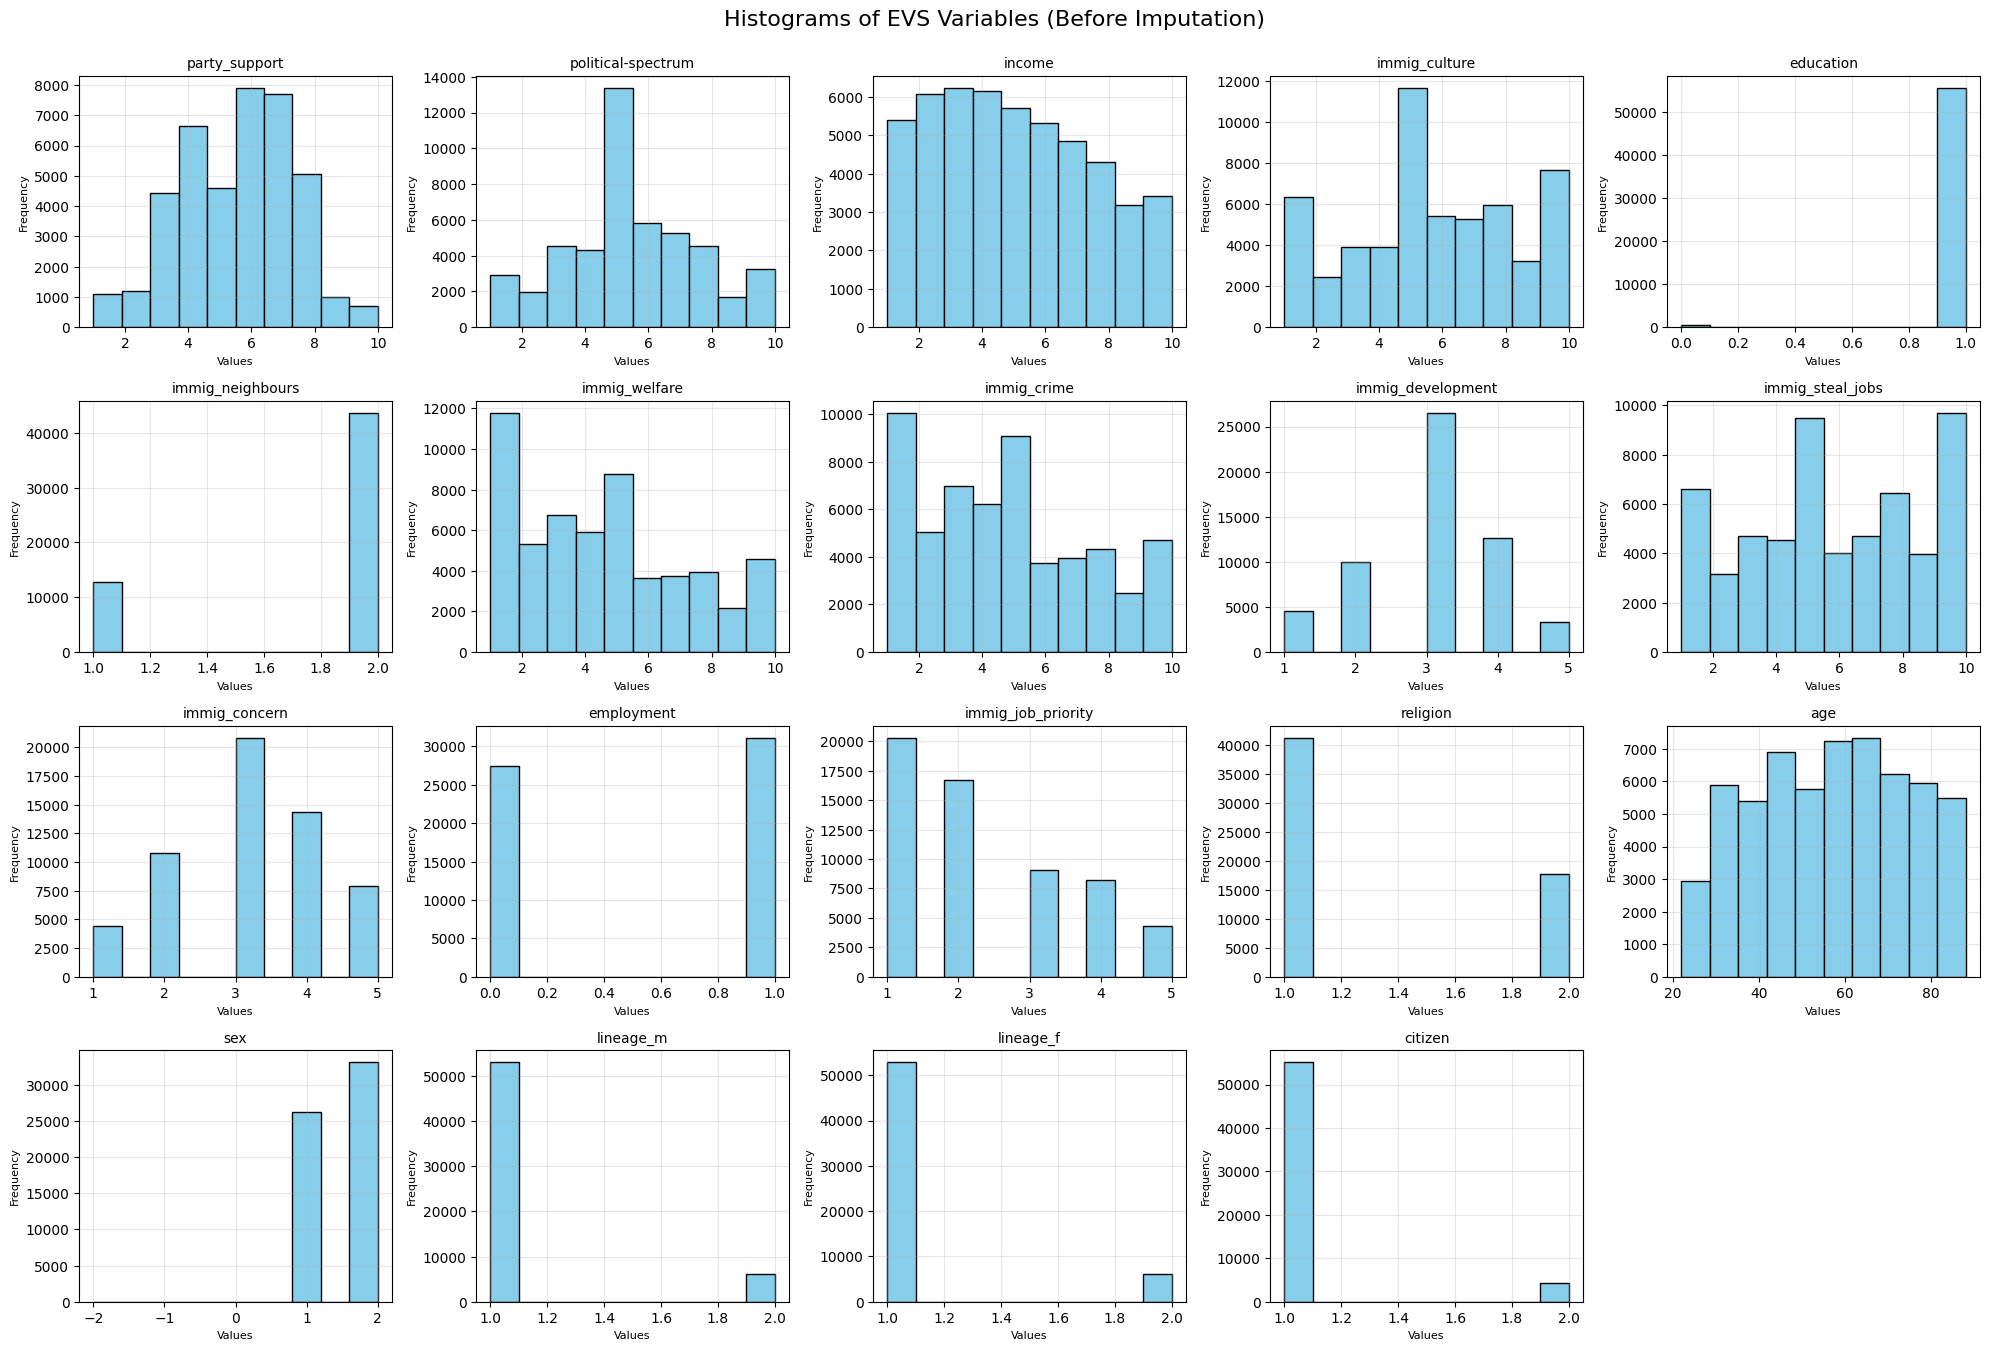

Histograms saved to: /content/drive/My Drive/PB310/EVS_Histograms_Before_Imputation.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# With the MCAR test revealing many variables are NOT MCAR, it is essential to observe the distributions of variables.
import matplotlib.pyplot as plt

# Reload the cleaned EVS dataset
file_path = '/content/drive/My Drive/PB310/CleanedEVSWave7.xlsx'
evs_data = pd.read_excel(file_path)

# Variables to visualize
variables_to_plot = [
    'party_support', 'political-spectrum', 'income', 'immig_culture',
    'education', 'immig_neighbours', 'immig_welfare', 'immig_crime',
    'immig_development', 'immig_steal_jobs', 'immig_concern', 'employment',
    'immig_job_priority', 'religion', 'age', 'sex', 'lineage_m', 'lineage_f', 'citizen'
]

# Generate histograms for all variables in a 4x4 grid
plt.figure(figsize=(20, 16))  # Adjust the figure size
for i, column in enumerate(variables_to_plot, 1):
    plt.subplot(5, 5, i)
    evs_data[column].hist(bins=10, color='skyblue', edgecolor='black')
    plt.title(column, fontsize=10)
    plt.xlabel('Values', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle("Histograms of EVS Variables (Before Imputation)", fontsize=16, y=1.02)
plt.show()

# Optional: Save the figure as a single image
output_image_path = '/content/drive/My Drive/PB310/EVS_Histograms_Before_Imputation.png'
plt.savefig(output_image_path, bbox_inches='tight')
print(f"Histograms saved to: {output_image_path}")


In [ ]:
# Dealing with MAR and MCAR values can be done by multiple imputation (MI), or mean/median imputations. In some cases, we can use an interative imputation method or KNNs.
## However, for the purposes of creating an aggregated dataset for Analysis 1, a mean imputation will be conducted.
## For the country-level analysis, MI by iterative imputation will be conducted to ensure robustness in data (see Section 3 of the code)

from sklearn.experimental import enable_iterative_imputer  # Enable the feature
from sklearn.impute import IterativeImputer
import pandas as pd

# Step 1: Load the dataset
file_path = '/content/drive/My Drive/PB310/CleanedEVSWave7.xlsx'
evs_data = pd.read_excel(file_path)

# Step 2: Select variables for imputation
variables_to_impute = [
    'party_support', 'political-spectrum', 'income', 'immig_culture',
    'education', 'immig_neighbours', 'immig_welfare', 'immig_crime',
    'immig_development', 'immig_steal_jobs', 'immig_concern', 'employment',
    'immig_job_priority', 'religion', 'age', 'sex', 'lineage_m', 'lineage_f', 'citizen'
]

# Step 3: Perform Iterative Imputation
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data = iter_imputer.fit_transform(evs_data[variables_to_impute])

# Step 4: Replace the imputed values in the original dataset
evs_data[variables_to_impute] = pd.DataFrame(imputed_data, columns=variables_to_impute)

# Step 5: Save the imputed dataset
output_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'
evs_data.to_excel(output_path, index=False, engine='openpyxl')

print(f"Imputed dataset saved to: {output_path}")

# Iterative imputation was selected over KNN or Simple/Multiple imputation methods as this is a straightforward approach that circumvents the limitations of simple imputation by being more sensitive to data.
## NB: While the first choice, KNNs couldn't be performed due to the large size of the dataset; KNNs do not work particularly well with large tabular datasets.


Imputed dataset saved to: /content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx


Missing Values Summary After Iterative Imputation:
              Variable  Missing Count  Missing Percent (%)
0        party_support              0                  0.0
10       immig_concern              0                  0.0
17           lineage_f              0                  0.0
16           lineage_m              0                  0.0
15                 sex              0                  0.0
14                 age              0                  0.0
13            religion              0                  0.0
12  immig_job_priority              0                  0.0
11          employment              0                  0.0
9     immig_steal_jobs              0                  0.0
1   political-spectrum              0                  0.0
8    immig_development              0                  0.0
7          immig_crime              0                  0.0
6        immig_welfare              0                  0.0
5     immig_neighbours              0                  0.0
4    

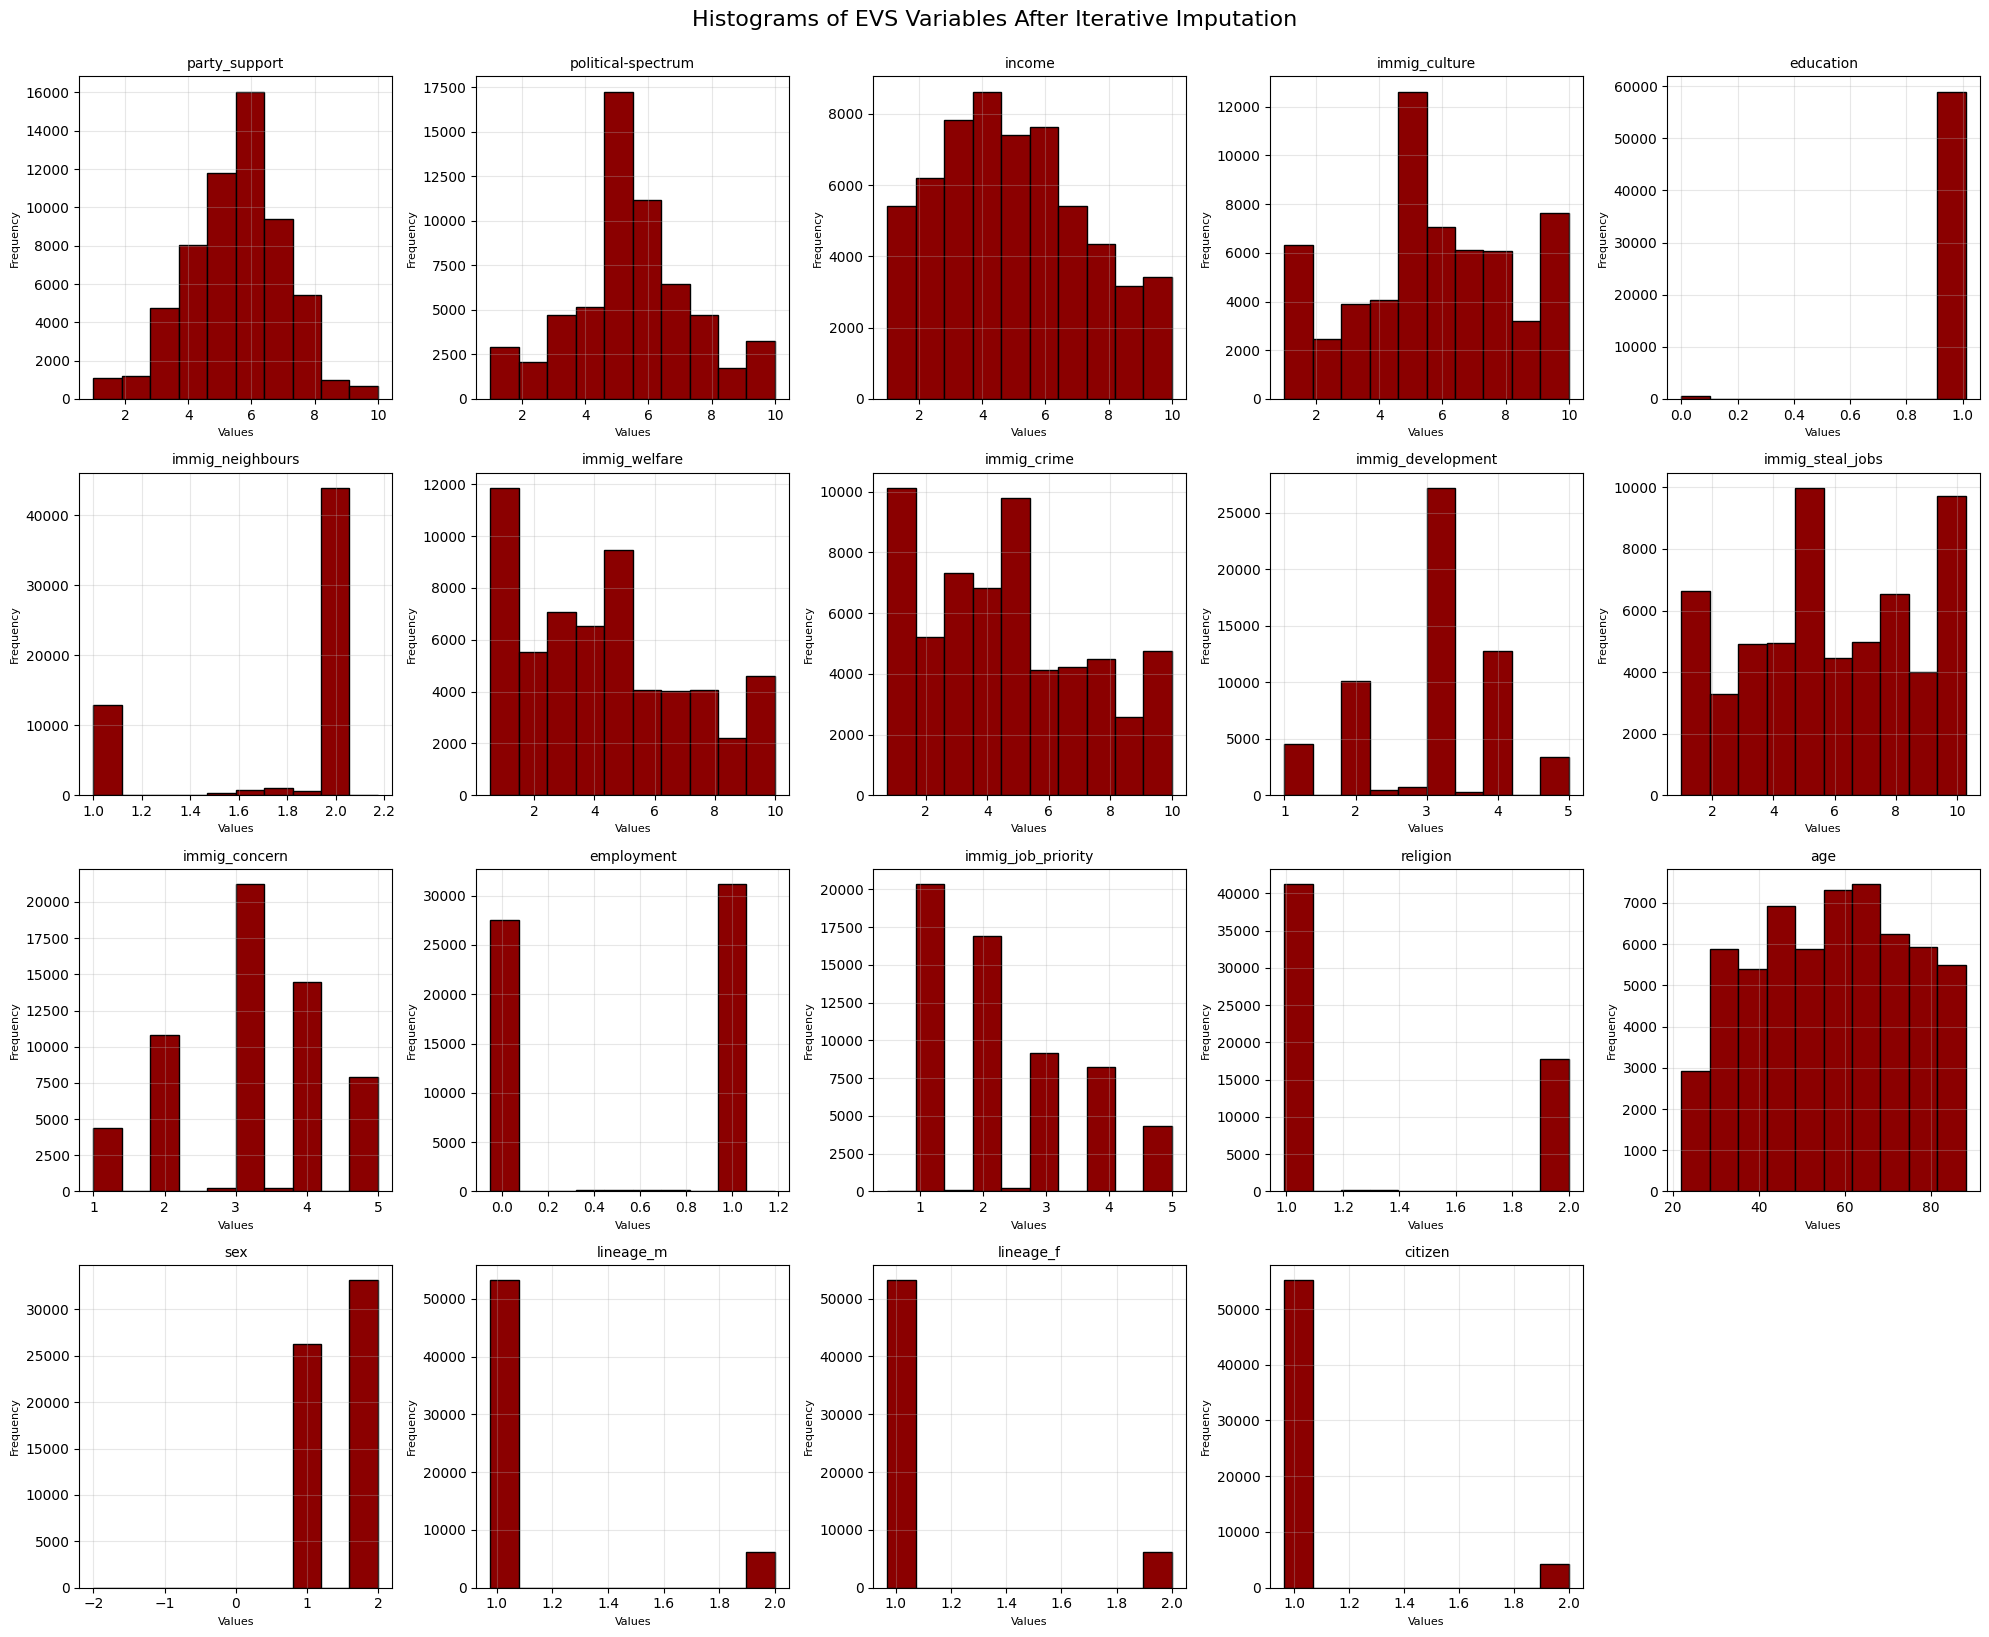

Histograms saved to: /content/drive/My Drive/PB310/EVS_Histograms_After_Imputation.png


<Figure size 640x480 with 0 Axes>

In [5]:
# Checking variable distributions post-imputation

# Loading the imputed dataset
file_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'
evs_data = pd.read_excel(file_path)

# Selecting the variables of interest for the missing values check
variables_to_check = [
    'party_support', 'political-spectrum', 'income', 'immig_culture',
    'education', 'immig_neighbours', 'immig_welfare', 'immig_crime',
    'immig_development', 'immig_steal_jobs', 'immig_concern', 'employment',
    'immig_job_priority', 'religion', 'age', 'sex', 'lineage_m', 'lineage_f', 'citizen'
]

missing_summary = evs_data[variables_to_check].isnull().sum()
missing_table = pd.DataFrame({
    'Variable': variables_to_check,
    'Missing Count': missing_summary.values,
    'Missing Percent (%)': (missing_summary / len(evs_data) * 100).values
}).sort_values(by='Missing Percent (%)', ascending=False)

# Display the missing values summary
print("Missing Values Summary After Iterative Imputation:")
print(missing_table)

# Generating histograms for the selected variables in a 4x4 grid
plt.figure(figsize=(20, 16))  # Adjust the figure size
for i, column in enumerate(variables_to_check, 1):
    plt.subplot(4, 5, i)
    evs_data[column].hist(bins=10, color='darkred', edgecolor='black')
    plt.title(column, fontsize=10)
    plt.xlabel('Values', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle("Histograms of EVS Variables After Iterative Imputation", fontsize=16, y=1.02)
plt.show()

# Saving the histograms
output_image_path = '/content/drive/My Drive/PB310/EVS_Histograms_After_Imputation.png'
plt.savefig(output_image_path, bbox_inches='tight')
print(f"Histograms saved to: {output_image_path}")

## Distributions are identical to pre-imputation, and there are no missing values. The dataset can be utilised for analysis.


In [ ]:
# Aggregating EVS
## Next, it is essential to aggregate the EVS data to continue with data transformation. After confirming the similarity of distributions post-imputations, it is now safe to aggregate values for the different indicators.
## Data is aggregated and grouped by country and country-code


file_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'
evs_data = pd.read_excel(file_path)

# Selecting columns for aggregation
columns_to_aggregate = [
    'party_support', 'political-spectrum', 'income', 'immig_culture',
    'education', 'immig_neighbours', 'immig_welfare', 'immig_crime',
    'immig_development', 'immig_steal_jobs', 'immig_concern', 'employment',
    'immig_job_priority', 'religion', 'age', 'sex', 'citizen', 'lineage_f', 'lineage_m'
]

# Grouping by country, country code, and year to calculate averages
aggregated_data = evs_data.groupby(['country', 'c_abrv', 'year'])[columns_to_aggregate].mean().reset_index()

# Saving the aggregated dataset
output_path = '/content/drive/My Drive/PB310/Aggregated_EVS_By_Country.xlsx'
aggregated_data.to_excel(output_path, index=False, engine='openpyxl')

print("Aggregated Dataset:")
print(aggregated_data.head())

print(f"Aggregated dataset saved to: {output_path}")


Aggregated Dataset:
   country c_abrv  year  party_support  political-spectrum    income  \
0        8     AL  2018       5.229486            5.349369  4.193958   
1       31     AZ  2018       5.928431            6.192768  3.091364   
2       40     AT  2018       5.876261            5.194895  4.688202   
3       51     AM  2018       6.040425            4.766563  4.087350   
4       70     BA  2019       6.279353            5.494346  4.765500   

   immig_culture  education  immig_neighbours  immig_welfare  ...  \
0       2.867712   0.994992          1.925851       6.724935  ...   
1       5.326432   0.998879          1.701939       6.126075  ...   
2       6.235942   0.999686          1.801818       3.261886  ...   
3       5.133749   0.989970          1.669870       5.829636  ...   
4       5.283038   0.971012          1.689584       3.686696  ...   

   immig_steal_jobs  immig_concern  employment  immig_job_priority  religion  \
0          6.791002       3.001723    0.303833      

In [ ]:
# In looking at the dataset, we see that countries outside the EU-member states are also present in the dataset.
## So we remove any non-EU countries by removing non-matching country codes

# Defining the list of EU country codes
eu_country_codes = [
    'AT', 'BG', 'HR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'HU',
    'IT', 'LV', 'LT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE'
]

# Load the aggregated dataset
file_path = '/content/drive/My Drive/PB310/Aggregated_EVS_By_Country.xlsx'
aggregated_data = pd.read_excel(file_path)

# Filtering out non-EU countries
aggregated_data = aggregated_data[aggregated_data['c_abrv'].isin(eu_country_codes)]

# Saving the updated dataset back to the same file
aggregated_data.to_excel(file_path, index=False, engine='openpyxl')

# Viewing the updated dataset to make sure it has all variables
print("Updated Dataset (EU Countries Only):")
print(aggregated_data.head())

print(f"The dataset has been updated to retain only EU countries and saved to: {file_path}")


Updated Dataset (EU Countries Only):
   country c_abrv  year  party_support  political-spectrum    income  \
2       40     AT  2018       5.876261            5.194895  4.688202   
5      100     BG  2017       5.322184            5.742517  4.509004   
7      191     HR  2017       5.036853            5.349379  6.088394   
8      203     CZ  2017       5.433827            5.532300  5.163106   
9      208     DK  2017       5.489160            5.274489  6.079526   

   immig_culture  education  immig_neighbours  immig_welfare  ...  \
2       6.235942   0.999686          1.801818       3.261886  ...   
5       5.781804   0.988650          1.472513       2.880759  ...   
7       5.231715   0.999671          1.794190       4.067302  ...   
8       7.535274   0.997104          1.428423       2.832910  ...   
9       6.805514   0.998082          1.914945       4.016178  ...   

   immig_steal_jobs  immig_concern  employment  immig_job_priority  religion  \
2          5.730247       2.946790 

###*Dataset 2: Eurostat*

In [ ]:
# As EVS is cross-sectional and collected over 2017-2022, yearly immigration stats cannot be used effectively alongside EVS responses.
## Instead, a net percentage change in country-level migration over 2011-2019 a better predictor, and can circumvent any temporal mismatches in annual country-level data. (ref. Appendix)

# Step 1: Load the Eurostat dataset
eurostat_data = pd.read_excel('/content/drive/My Drive/PB310/eurostat_eu_cleaned.xlsx')

# Step 2: Convert year columns to numeric
year_columns = [str(year) for year in range(2011, 2023)]  # Columns from 2011 to 2022
eurostat_data[year_columns] = eurostat_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Calculate average immigration (2017–2019)
eurostat_data['avg_immigration_2017_2019'] = eurostat_data[['2017', '2018', '2019']].mean(axis=1)

# Step 4: Calculate yearly immigration change and percentage change (2011–2019)
for year in range(2011, 2019):
    # Calculate yearly change
    eurostat_data[f'change_{year}_{year+1}'] = eurostat_data[str(year+1)] - eurostat_data[str(year)]

    # Calculate yearly percentage change
    eurostat_data[f'perc_change_{year}_{year+1}'] = (
        (eurostat_data[str(year+1)] - eurostat_data[str(year)]) / eurostat_data[str(year)]
    ) * 100

# Calculate the mean yearly change (2011–2019)
change_cols = [f'change_{year}_{year+1}' for year in range(2011, 2019)]
eurostat_data['avg_yearly_change_2011_2019'] = eurostat_data[change_cols].mean(axis=1)

# Calculate the mean yearly percentage change (2011–2019)
perc_change_cols = [f'perc_change_{year}_{year+1}' for year in range(2011, 2019)]
eurostat_data['avg_yearly_perc_change_2011_2019'] = eurostat_data[perc_change_cols].mean(axis=1)

# Step 5: Drop intermediate yearly change columns (optional)
eurostat_data = eurostat_data.drop(columns=change_cols + perc_change_cols)

# Step 6: Save the updated Eurostat dataset back to Excel
output_path = '/content/drive/My Drive/PB310/UpdatedEurostatDataset_with_Percentage_Change.xlsx'
eurostat_data.to_excel(output_path, index=False, engine='openpyxl')

# Step 7: View the updated dataset
print("Updated Eurostat Dataset:")
print(eurostat_data.head())




Updated Eurostat Dataset:
    Country      2011    2012    2013    2014     2015     2016    2017  \
0   Belgium  147377.0  129477  120078  123158   146626   123702  126703   
1  Bulgaria       NaN   14103   18570   26615    25223    21241   25597   
2   Czechia   27114.0   34337   30124   29897    29602    64083   51847   
3   Denmark   52833.0   54409   60312   68388    78492    74383   68579   
4   Germany  489422.0  592175  692713  866757  1549937  1046171  866541   

     2018    2019    2020    2021     2022 country_code  \
0  137860  150006  118683  139743   208356           BE   
1   29559   37929   37364   39461    40619           BG   
2   65910  105888   63095   69360   347429           CZ   
3   64669   61384   57230   63489   121183           DK   
4  825736  804821  642399  775946  1943445           DE   

   avg_immigration_2017_2019  avg_yearly_change_2011_2019  \
0              138189.666667                   328.625000   
1               31028.333333                  

###*Dataset 3: V-Dem*

In [ ]:
# The V-Dem dataset codes for rhetoric during election years. As some EU countries have elections between and before 2017-2019, the decision was made to get the weighted average of indicators.
## The weights are based on proximity to the EVS timeframe, to ensure robust values.

# Step 1: Load the V-Dem dataset
file_path = '/content/drive/My Drive/PB310/Raw-VDem-CY-2024.xlsx'
vdem_data = pd.read_excel(file_path)

# Step 2: Identify countries with more than one regime
countries_with_changes = vdem_data['country_name'].value_counts()
countries_with_changes = countries_with_changes[countries_with_changes > 1].index

# Step 3: Create a filtered dataset for countries with regime changes
vdem_filtered = vdem_data[vdem_data['country_name'].isin(countries_with_changes)]

# Step 4: Calculate weights based on EVS timeframe (2017–2019) for countries with regime changes
def calculate_weight(row):
    evs_start = datetime(2017, 1, 1)
    evs_end = datetime(2019, 12, 31)
    regime_start = datetime(row['year'], 1, 1)
    regime_end = row['end_date'] if 'end_date' in row else datetime(row['year'], 12, 31)

    # Calculate overlap with EVS timeframe
    overlap_start = max(regime_start, evs_start)
    overlap_end = min(regime_end, evs_end)

    if overlap_start < overlap_end:
        overlap_days = (overlap_end - overlap_start).days + 1
        evs_days = (evs_end - evs_start).days + 1
        return overlap_days / evs_days  # Proportion of EVS timeframe
    else:
        return 0  # No overlap

# Apply the weight calculation to the filtered dataset
vdem_filtered['weight'] = vdem_filtered.apply(calculate_weight, axis=1)

# Step 5: Calculate weighted values for metrics in filtered dataset
columns_to_aggregate = [
    'v2xpas_exclusion_government', 'v2xpas_religion_government', 'v2smpolhate'
]
for col in columns_to_aggregate:
    vdem_filtered[f'{col}_weighted'] = vdem_filtered[col] * vdem_filtered['weight']

# Step 6: Aggregate weighted averages for countries with regime changes
weighted_aggregates = vdem_filtered.groupby('country_name').apply(
    lambda group: pd.Series({
        col: (group[f'{col}_weighted'].sum() / group['weight'].sum())
        for col in columns_to_aggregate if group['weight'].sum() > 0
    })
).reset_index()

# Step 7: Handle countries without regime changes (single entry)
single_regime_countries = vdem_data[~vdem_data['country_name'].isin(countries_with_changes)]
single_regime_aggregates = single_regime_countries.groupby('country_name')[
    columns_to_aggregate
].mean().reset_index()

# Step 8: Combine both datasets into the final dataset
final_aggregated_vdem = pd.concat([weighted_aggregates, single_regime_aggregates], ignore_index=True)

# Step 9: Save the final dataset
output_path = '/content/drive/My Drive/PB310/Weighted_Aggregated_VDem_CY_2024_Final_By_Country_Name.xlsx'
final_aggregated_vdem.to_excel(output_path, index=False, engine='openpyxl')

# View the results
print("Final Weighted Aggregated Dataset (Using Country Name):")
print(final_aggregated_vdem.head())

print(f"The dataset has been saved to: {output_path}")


Final Weighted Aggregated Dataset (Using Country Name):
  country_name  v2xpas_exclusion_government  v2xpas_religion_government  \
0      Austria                        0.598                       0.350   
1      Belgium                        0.212                       0.127   
2      Denmark                        0.363                       0.075   
3      Estonia                        0.580                       0.152   
4      Finland                        0.118                       0.101   

   v2smpolhate  
0      -0.8365  
1       0.3840  
2       1.8820  
3       1.1350  
4       1.5100  
The dataset has been saved to: /content/drive/My Drive/PB310/Weighted_Aggregated_VDem_CY_2024_Final_By_Country_Name.xlsx


<ipython-input-60-434300db7564>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdem_filtered['weight'] = vdem_filtered.apply(calculate_weight, axis=1)
<ipython-input-60-434300db7564>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdem_filtered[f'{col}_weighted'] = vdem_filtered[col] * vdem_filtered['weight']
<ipython-input-60-434300db7564>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
## V-Dem does not have the ISO country codes so we map the country names to codes to combine the dataset with others later

# Step 1: Create a mapping of country names to ISO codes
country_to_iso = {
    'Austria': 'AT', 'Belgium': 'BE', 'Bulgaria': 'BG', 'Croatia': 'HR',
    'Cyprus': 'CY', 'Czechia': 'CZ', 'Denmark': 'DK', 'Estonia': 'EE',
    'Finland': 'FI', 'France': 'FR', 'Germany': 'DE', 'Greece': 'GR',
    'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Latvia': 'LV',
    'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT', 'Netherlands': 'NL',
    'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovakia': 'SK',
    'Slovenia': 'SI', 'Spain': 'ES', 'Sweden': 'SE'
}

# Step 2: Load the aggregated dataset
file_path = '/content/drive/My Drive/PB310/Weighted_Aggregated_VDem_CY_2024_Final_By_Country_Name.xlsx'
final_aggregated_vdem = pd.read_excel(file_path)

# Step 3: Add a column for ISO country codes
final_aggregated_vdem['country_code'] = final_aggregated_vdem['country_name'].map(country_to_iso)

# Step 4: Save the updated dataset back to the same file
final_aggregated_vdem.to_excel(file_path, index=False, engine='openpyxl')

# Step 5: View the updated dataset
print("Updated Dataset with ISO Country Codes:")
print(final_aggregated_vdem.head())

print(f"The dataset has been updated with ISO country codes and saved to: {file_path}")


Updated Dataset with ISO Country Codes:
  country_name  v2xpas_exclusion_government  v2xpas_religion_government  \
0      Austria                        0.598                       0.350   
1      Belgium                        0.212                       0.127   
2      Denmark                        0.363                       0.075   
3      Estonia                        0.580                       0.152   
4      Finland                        0.118                       0.101   

   v2smpolhate country_code  
0      -0.8365           AT  
1       0.3840           BE  
2       1.8820           DK  
3       1.1350           EE  
4       1.5100           FI  
The dataset has been updated with ISO country codes and saved to: /content/drive/My Drive/PB310/Weighted_Aggregated_VDem_CY_2024_Final_By_Country_Name.xlsx


###*Dataset 4: MIPEX*

In [ ]:
## The MIPEX has values from 2011-2019, so data from 2017-2019 is selected, and mean scores computed.

# Step 1: Load the MIPEX dataset
mipex_path = '/content/drive/My Drive/PB310/Cleaned-MIPEX.xlsx'
mipex_data = pd.read_excel(mipex_path)

# Step 2: Filter for years 2017, 2018, and 2019
mipex_filtered = mipex_data[mipex_data['year'].isin([2017, 2018, 2019])]

# Step 3: Aggregate by country_code
# Calculate the mean of all MIPEX scores (assuming numeric columns)
aggregated_mipex = mipex_filtered.groupby('country_code').mean(numeric_only=True).reset_index()

# Step 4: Save the aggregated dataset
output_path = '/content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx'
aggregated_mipex.to_excel(output_path, index=False, engine='openpyxl')

print(f"Aggregated MIPEX dataset saved to: {output_path}")


Aggregated MIPEX dataset saved to: /content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx


### Dataset 5: World Bank

In [ ]:
## The world Bank dataset does not have ISO codes, so these are first mapped and added to the dataset
## Then, mean GDP values are computed

# Load the GDP dataset
gdp_data_path = '/content/drive/My Drive/PB310/GDP_dataset.xls'
gdp_data = pd.read_excel(gdp_data_path)

# List of 21 EU countries in your dataset and their corresponding names in the GDP dataset
country_name_mapping = {
    'Austria': 'Austria',
    'Bulgaria': 'Bulgaria',
    'Czech Republic': 'Czechia',
    'Germany': 'Germany',
    'Denmark': 'Denmark',
    'Estonia': 'Estonia',
    'Spain': 'Spain',
    'Finland': 'Finland',
    'France': 'France',
    'Croatia': 'Croatia',
    'Hungary': 'Hungary',
    'Italy': 'Italy',
    'Lithuania': 'Lithuania',
    'Latvia': 'Latvia',
    'Netherlands': 'Netherlands',
    'Poland': 'Poland',
    'Portugal': 'Portugal',
    'Romania': 'Romania',
    'Sweden': 'Sweden',
    'Slovenia': 'Slovenia',
    'Slovakia': 'Slovak Republic'
}

# Filter GDP data for the matched countries
gdp_filtered = gdp_data[gdp_data['country_name'].isin(country_name_mapping.values())]

# Select only the columns for the years 2017-2019 and calculate the mean GDP
gdp_filtered['mean_GDP'] = gdp_filtered[['2017', '2018', '2019']].mean(axis=1)

# Add ISO codes for alignment (manually map country names to ISO codes)
iso_codes = {
    'Austria': 'AT', 'Bulgaria': 'BG', 'Czechia': 'CZ', 'Germany': 'DE',
    'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI',
    'France': 'FR', 'Croatia': 'HR', 'Hungary': 'HU', 'Italy': 'IT',
    'Lithuania': 'LT', 'Latvia': 'LV', 'Netherlands': 'NL', 'Poland': 'PL',
    'Portugal': 'PT', 'Romania': 'RO', 'Sweden': 'SE', 'Slovenia': 'SI',
    'Slovak Republic': 'SK'
}

# Map ISO codes using the country names
gdp_filtered['country_code'] = gdp_filtered['country_name'].map(iso_codes)

# Create the final GDP dataset with selected columns
final_gdp = gdp_filtered[['country_name', 'country_code', 'mean_GDP']]

# Save the final GDP dataset
final_gdp_path = '/content/drive/My Drive/PB310/final_GDP_dataset.xlsx'  # Replace with desired path
final_gdp.to_excel(final_gdp_path, index=False)

# Output the final dataset
print(final_gdp)


        country_name country_code      mean_GDP
14           Austria           AT  56953.751788
21          Bulgaria           BG  23288.688854
54           Czechia           CZ  42199.410262
55           Germany           DE  56551.340626
58           Denmark           DK  57700.062390
70             Spain           ES  41611.764715
71           Estonia           EE  37404.671703
75           Finland           FI  49586.547324
77            France           FR  47326.892421
99           Croatia           HR  30245.734059
101          Hungary           HU  32185.876944
116            Italy           IT  43874.263391
143        Lithuania           LT  37097.472172
145           Latvia           LV  29887.555444
176      Netherlands           NL  59067.360918
190           Poland           PL  32799.251337
194         Portugal           PT  35244.399744
201          Romania           RO  30054.299873
221  Slovak Republic           SK  31913.759053
222         Slovenia           SI  39057

<ipython-input-21-5f4ce8610c79>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered['mean_GDP'] = gdp_filtered[['2017', '2018', '2019']].mean(axis=1)
<ipython-input-21-5f4ce8610c79>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered['country_code'] = gdp_filtered['country_name'].map(iso_codes)


## Section 2: Data Transformation

### *Combining Aggregated EVS and Eurostat*

In [ ]:
# Step 1: Load the aggregated EVS dataset and Eurostat dataset
evs_file_path = '/content/drive/My Drive/PB310/Aggregated_EVS_By_Country.xlsx'
eurostat_file_path = '/content/drive/My Drive/PB310/UpdatedEurostatDataset_with_Percentage_Change.xlsx'

evs_data = pd.read_excel(evs_file_path)
eurostat_data = pd.read_excel(eurostat_file_path)

# Step 2: Select relevant columns from the Eurostat dataset
eurostat_columns = [
    'country_code', 'avg_immigration_2017_2019', 'avg_yearly_change_2011_2019',
    'avg_yearly_perc_change_2011_2019', '2017', '2018', '2019'
]
eurostat_subset = eurostat_data[eurostat_columns]

# Step 3: Merge the EVS aggregated data with Eurostat data
final_combined_dataset = pd.merge(evs_data, eurostat_subset, on='country_code', how='inner')

# Step 4: Save the combined dataset
output_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'
final_combined_dataset.to_excel(output_path, index=False, engine='openpyxl')

# Step 5: View the combined dataset
print("Combined Dataset:")
print(final_combined_dataset.head())

print(f"The combined dataset has been saved to: {output_path}")


Combined Dataset:
   country country_code  year  party_support  political-spectrum    income  \
0       40           AT  2018       5.876261            5.194895  4.688202   
1      100           BG  2017       5.322184            5.742517  4.509004   
2      191           HR  2017       5.036853            5.349379  6.088394   
3      203           CZ  2017       5.433827            5.532300  5.163106   
4      208           DK  2017       5.489160            5.274489  6.079526   

   immig_culture  education  immig_neighbours  immig_welfare  ...       sex  \
0       6.235942   0.999686          1.801818       3.261886  ...  1.549270   
1       5.781804   0.988650          1.472513       2.880759  ...  1.598203   
2       5.231715   0.999671          1.794190       4.067302  ...  1.581708   
3       7.535274   0.997104          1.428423       2.832910  ...  1.606295   
4       6.805514   0.998082          1.914945       4.016178  ...  1.512195   

    citizen  lineage_f  lineage_m  avg

###*Combining V-Dem to Aggregated EVS + Eurostat*

In [ ]:
# Step 1: Load the final combined dataset and the V-Dem aggregated dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'
vdem_dataset_path = '/content/drive/My Drive/PB310/Weighted_Aggregated_VDem_CY_2024_Final_By_Country_Name.xlsx'

final_combined_dataset = pd.read_excel(final_dataset_path)
vdem_aggregated = pd.read_excel(vdem_dataset_path)

# Step 2: Select the relevant columns from the V-Dem dataset
vdem_columns = [
    'country_code', 'v2xpas_exclusion_government',
    'v2xpas_religion_government', 'v2smpolhate'
]

vdem_subset = vdem_aggregated[vdem_columns]

# Step 3: Merge the V-Dem variables into the final combined dataset
final_combined_dataset = pd.merge(
    final_combined_dataset,
    vdem_subset,
    on='country_code',
    how='left'  # Use 'left' to retain all countries in the final dataset
)

# Step 4: Save the updated dataset back to the same file
final_combined_dataset.to_excel(final_dataset_path, index=False, engine='openpyxl')

# Step 5: View the updated dataset
print("Updated Final Combined Dataset (with V-Dem Variables):")
print(final_combined_dataset.head())

## With this, we have created a final combined dataset for *Analysis 1*


Updated Final Combined Dataset (with V-Dem Variables):
   country country_code  year  party_support  political-spectrum    income  \
0       40           AT  2018       5.876261            5.194895  4.688202   
1      100           BG  2017       5.322184            5.742517  4.509004   
2      191           HR  2017       5.036853            5.349379  6.088394   
3      203           CZ  2017       5.433827            5.532300  5.163106   
4      208           DK  2017       5.489160            5.274489  6.079526   

   immig_culture  education  immig_neighbours  immig_welfare  ...  lineage_m  \
0       6.235942   0.999686          1.801818       3.261886  ...   1.156934   
1       5.781804   0.988650          1.472513       2.880759  ...   1.015467   
2       5.231715   0.999671          1.794190       4.067302  ...   1.144636   
3       7.535274   0.997104          1.428423       2.832910  ...   1.077427   
4       6.805514   0.998082          1.914945       4.016178  ...   1.096771

### *Combining Aggregated Dataset with World Bank GDP Indicator*

In [ ]:
# Step 1: Load the final combined dataset and the GDP dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'
gdp_dataset_path = '/content/drive/My Drive/PB310/final_GDP_dataset.xlsx'  # Replace with your GDP dataset path

final_combined_dataset = pd.read_excel(final_dataset_path)
gdp_data = pd.read_excel(gdp_dataset_path)  # Load the GDP dataset

# Step 2: Merge the GDP data into the final combined dataset
final_combined_dataset = pd.merge(
    final_combined_dataset,
    gdp_data[['country_code', 'mean_GDP']],  # Merge using country_code and GDP
    on='country_code',  # Match based on the country_code column
    how='left'  # Use 'left' to retain all countries in the final dataset
)

# Step 3: Save the updated dataset back to the same file
final_combined_dataset.to_excel(final_dataset_path, index=False, engine='openpyxl')

# Step 4: View the updated dataset
print("Updated Final Combined Dataset (with GDP):")
print(final_combined_dataset.head())


Updated Final Combined Dataset (with GDP):
   country country_code  year  party_support  political-spectrum    income  \
0       40           AT  2018       5.876261            5.194895  4.688202   
1      100           BG  2017       5.322184            5.742517  4.509004   
2      191           HR  2017       5.036853            5.349379  6.088394   
3      203           CZ  2017       5.433827            5.532300  5.163106   
4      208           DK  2017       5.489160            5.274489  6.079526   

   immig_culture  education  immig_neighbours  immig_welfare  ...    2017  \
0       6.235942   0.999686          1.801818       3.261886  ...  111801   
1       5.781804   0.988650          1.472513       2.880759  ...   25597   
2       5.231715   0.999671          1.794190       4.067302  ...   15553   
3       7.535274   0.997104          1.428423       2.832910  ...   51847   
4       6.805514   0.998082          1.914945       4.016178  ...   68579   

     2018    2019  v2xpas

### *Combining Individual Level EVS with V-Dem and Eurostat*

In [ ]:
# Step 1: Load datasets
evs_imputed_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'  # Iterative imputed EVS dataset
aggregated_scores_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'  # Aggregated Eurostat and V-Dem data

evs_data = pd.read_excel(evs_imputed_path)  # Load the imputed EVS dataset
aggregated_data = pd.read_excel(aggregated_scores_path)  # Load the aggregated dataset

# Step 2: Select relevant columns from the aggregated dataset
aggregated_columns = [
    'country_code', 'avg_immigration_2017_2019', 'avg_yearly_change_2011_2019', 'avg_yearly_perc_change_2011_2019',
    'v2xpas_exclusion_government', 'v2smpolhate', 'v2xpas_religion_government'
]
aggregated_subset = aggregated_data[aggregated_columns]

# Step 3: Standardize country codes in both datasets
evs_data['country_code'] = evs_data['country_code'].str.strip().str.upper()
aggregated_subset['country_code'] = aggregated_subset['country_code'].str.strip().str.upper()

# Step 4: Identify unmatched countries
unmatched_countries = evs_data.loc[~evs_data['country_code'].isin(aggregated_subset['country_code']), 'country_code']
print("Unmatched Countries in EVS Dataset:", unmatched_countries.unique())

# Step 5: Remove unmatched countries from EVS dataset
evs_data = evs_data[~evs_data['country_code'].isin(unmatched_countries.unique())]

# Step 6: Merge datasets by 'country_code'
merged_data = pd.merge(
    evs_data,
    aggregated_subset,
    on='country_code',  # Key column for merging
    how='left'  # Keep all rows from the filtered EVS dataset
)

# Step 7: Save the merged dataset
output_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
merged_data.to_excel(output_path, index=False, engine='openpyxl')

print(f"Merged dataset saved to: {output_path}")


<ipython-input-117-c652cef0805a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_subset['country_code'] = aggregated_subset['country_code'].str.strip().str.upper()


Unmatched Countries in EVS Dataset: ['AL' 'AZ' 'AM' 'BA' 'BY' 'GE' 'IS' 'ME' 'NO' 'RU' 'RS' 'CH' 'UA' 'MK'
 'GB']
Merged dataset saved to: /content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx


###*Combining Individual Level Data with World Bank GDP Indicator*

In [ ]:
# Step 1: Load datasets
evs_imputed_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'  # Iterative imputed EVS dataset
aggregated_scores_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'  # Aggregated Eurostat and V-Dem data
gdp_dataset_path = '/content/drive/My Drive/PB310/final_GDP_dataset.xlsx'  # Path to GDP dataset

evs_data = pd.read_excel(evs_imputed_path)  # Load the imputed EVS dataset
aggregated_data = pd.read_excel(aggregated_scores_path)  # Load the aggregated dataset
gdp_data = pd.read_excel(gdp_dataset_path)  # Load the GDP dataset

# Step 2: Select relevant columns from the aggregated dataset
aggregated_columns = [
    'country_code', 'avg_immigration_2017_2019', 'avg_yearly_change_2011_2019', 'avg_yearly_perc_change_2011_2019',
    'v2xpas_exclusion_government', 'v2smpolhate', 'v2xpas_religion_government'
]
aggregated_subset = aggregated_data[aggregated_columns]

# Step 3: Standardize country codes in all datasets
evs_data['country_code'] = evs_data['country_code'].str.strip().str.upper()
aggregated_subset['country_code'] = aggregated_subset['country_code'].str.strip().str.upper()
gdp_data['country_code'] = gdp_data['country_code'].str.strip().str.upper()

# Step 4: Identify unmatched countries
unmatched_countries = evs_data.loc[~evs_data['country_code'].isin(aggregated_subset['country_code']), 'country_code']
print("Unmatched Countries in EVS Dataset:", unmatched_countries.unique())

# Step 5: Remove unmatched countries from EVS dataset
evs_data = evs_data[~evs_data['country_code'].isin(unmatched_countries.unique())]

# Step 6: Merge datasets by 'country_code'
merged_data = pd.merge(
    evs_data,
    aggregated_subset,
    on='country_code',  # Key column for merging
    how='left'  # Keep all rows from the filtered EVS dataset
)

# Step 7: Merge GDP into the dataset
merged_data = pd.merge(
    merged_data,
    gdp_data[['country_code', 'mean_GDP']],  # Select country_code and GDP for merging
    on='country_code',  # Merge by country_code
    how='left'  # Keep all rows in the individual-level EVS dataset
)

# Step 8: Save the updated dataset back to the same file
output_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
merged_data.to_excel(output_path, index=False, engine='openpyxl')

print(f"Updated dataset with GDP added and saved to: {output_path}")

## With this, we have created the final datasets for analysis.


<ipython-input-25-74e5f7eb17bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_subset['country_code'] = aggregated_subset['country_code'].str.strip().str.upper()


Unmatched Countries in EVS Dataset: ['AL' 'AZ' 'AM' 'BA' 'BY' 'GE' 'IS' 'ME' 'NO' 'RU' 'RS' 'CH' 'UA' 'MK'
 'GB']
Updated dataset with GDP added and saved to: /content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx
